# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose the spacecraft, sensor, view direction and particle species:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the path to your data folder:

In [3]:
# Path for the downloaded data (by default the current directory)
data_path = f"{os.getcwd()}"

# Choose time range for data loading, and create the Event object:

In [38]:
# Format of date: year, month, day
startdate = datetime.date(2021, 10, 28)
enddate = datetime.date(2021, 10, 29)

# Get event data:
Event_onset = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

solo_L2_epd-ept-asun-rates_20211028_V01.cdf: 5.29MB [00:03, 1.46MB/s]           
solo_L2_epd-ept-asun-rates_20211029_V01.cdf: 12.3MB [00:06, 1.77MB/s]           
solo_L2_epd-ept-north-rates_20211028_V01.cdf: 5.69MB [00:03, 1.67MB/s]          
solo_L2_epd-ept-north-rates_20211029_V01.cdf: 14.4MB [00:07, 1.88MB/s]          
solo_L2_epd-ept-south-rates_20211028_V01.cdf: 4.95MB [00:02, 1.73MB/s]          
solo_L2_epd-ept-south-rates_20211029_V01.cdf: 13.0MB [00:06, 1.88MB/s]          
solo_L2_epd-ept-sun-rates_20211028_V01.cdf: 5.08MB [00:03, 1.58MB/s]            
solo_L2_epd-ept-sun-rates_20211029_V01.cdf: 15.7MB [00:08, 1.79MB/s]            


# Print out the energy channel keys and corresponding energy ranges

In [13]:
Event_onset.print_energies()

solo, ept:

Channel number | Energy range
 0  :  0.0312 - 0.0348 MeV
 1  :  0.0330 - 0.0369 MeV
 2  :  0.0348 - 0.0380 MeV
 3  :  0.0380 - 0.0406 MeV
 4  :  0.0406 - 0.0432 MeV
 5  :  0.0432 - 0.0459 MeV
 6  :  0.0459 - 0.0497 MeV
 7  :  0.0497 - 0.0533 MeV
 8  :  0.0533 - 0.0580 MeV
 9  :  0.0580 - 0.0627 MeV
 10  :  0.0627 - 0.0673 MeV
 11  :  0.0673 - 0.0731 MeV
 12  :  0.0731 - 0.0788 MeV
 13  :  0.0788 - 0.0856 MeV
 14  :  0.0856 - 0.0934 MeV
 15  :  0.0934 - 0.1011 MeV
 16  :  0.1011 - 0.1109 MeV
 17  :  0.1109 - 0.1197 MeV
 18  :  0.1197 - 0.1305 MeV
 19  :  0.1305 - 0.1423 MeV
 20  :  0.1423 - 0.1541 MeV
 21  :  0.1541 - 0.1679 MeV
 22  :  0.1679 - 0.1835 MeV
 23  :  0.1835 - 0.1995 MeV
 24  :  0.1995 - 0.2181 MeV
 25  :  0.2181 - 0.2371 MeV
 26  :  0.2371 - 0.2578 MeV
 27  :  0.2578 - 0.2817 MeV
 28  :  0.2817 - 0.3061 MeV
 29  :  0.3061 - 0.3339 MeV
 30  :  0.3339 - 0.3661 MeV
 31  :  0.3661 - 0.3989 MeV
 32  :  0.3989 - 0.4348 MeV
 33  :  0.4348 - 0.4714 MeV


# Set the averaging period, background_range, channels to plot and the time range of the plot:

In [41]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Set to None to not resample data
averaging = "1min"

# Set the time range for what is considered the background preceding the event:
# Format of datetime: year, month, day, hour, minute, second
background_range = (datetime.datetime(2021, 10, 28, 10, 0, 0), 
                    datetime.datetime(2021, 10, 28, 15, 0, 0))

# Set the channel(s) to plot (use a list to combine multiple channels):
channels = 19

# Set the time range for the plot:
plot_range = [datetime.datetime(2021, 10, 28, 0),datetime.datetime(2021, 10, 29, 0)]

# Run the cell to produce a plot

##### >Energy channels< #####
0.1305 - 0.1423 MeV
#############################

##### >Flux peak< #####
                             flux
Time                             
2021-10-28 17:25:30  30575.884766
#######################

##### >Onset time< #####
2021-10-28 15:51:30
########################

##### >Mean of background intensity< #####
10.432718
##########################################

##### >Std of background intensity< #####
28.535461
#########################################

##### >Particle species< #####
electrons
##############################



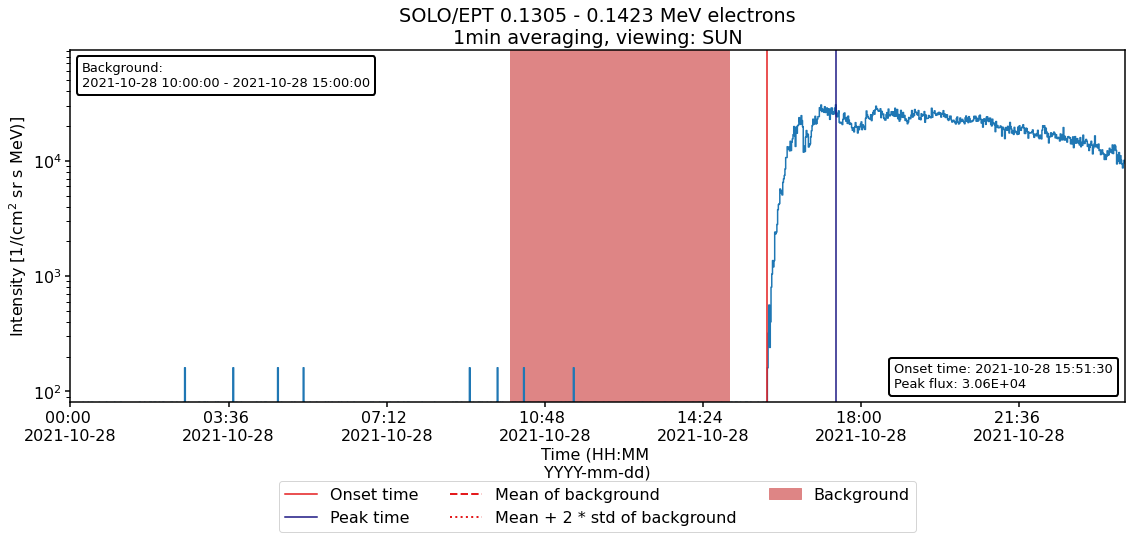

In [42]:
flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = Event_onset.analyse(viewing=w.view_drop.value, background_range=background_range, channels=channels,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = Event_onset.output

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [8]:
print(f"Onset: {output['onset'].round(freq='s')}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time'].round(freq='s')}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-10-09 06:51:00
Peak flux: 1.29e+05
Peak time: 2021-10-09 07:47:00
Bg mean: 2.36e+01


# Saving figures

In [9]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own here:
# file_name = ""

In [10]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/SPOT/STEREO-A_SEPT_sun_electrons_2min_20211009.png


In [11]:
# Save plot
fig.savefig(file_name, facecolor= 'white', transparent=False)